In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import random
import numpy as np

In [2]:
dfToplu = pd.DataFrame(pd.read_csv("WHR20_DataForTable2.1.csv"))
df2020 = pd.read_csv("2020.csv")
df2021 = pd.read_csv("2021.csv")
df2019 = dfToplu.groupby('year').get_group(2019)
df2018 =dfToplu.groupby('year').get_group(2018)
df2017 = dfToplu.groupby('year').get_group(2017)
df2016 = dfToplu.groupby('year').get_group(2016)

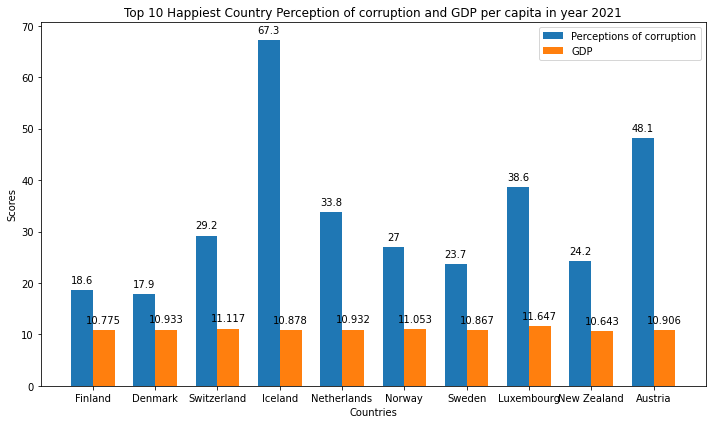

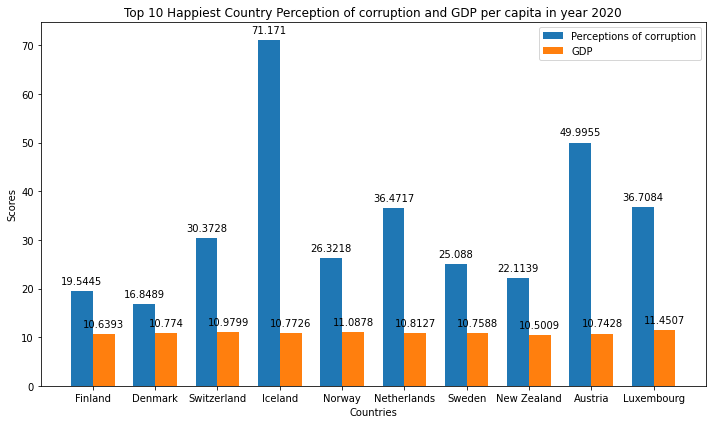

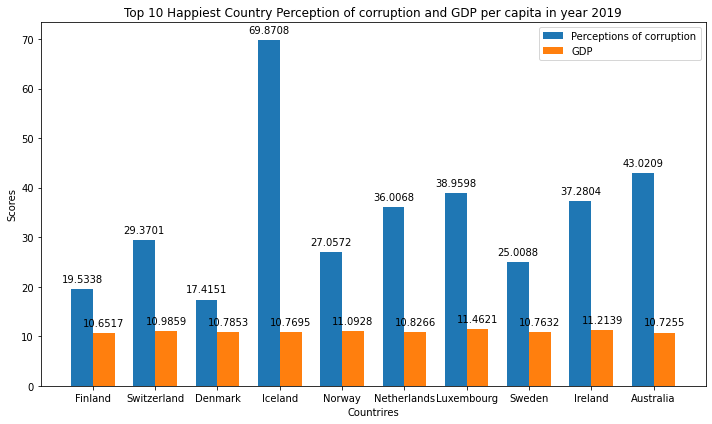

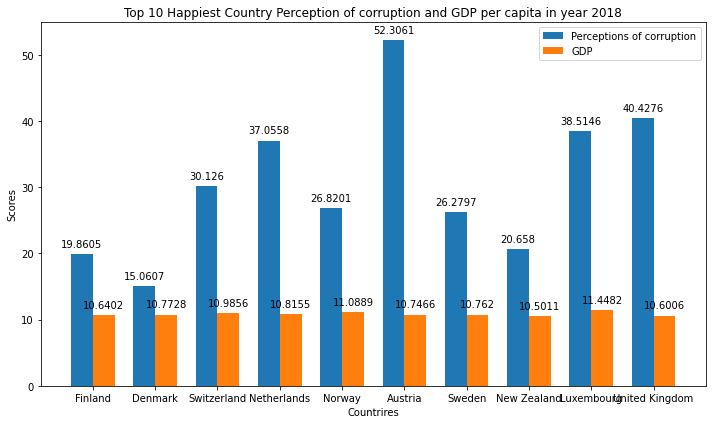

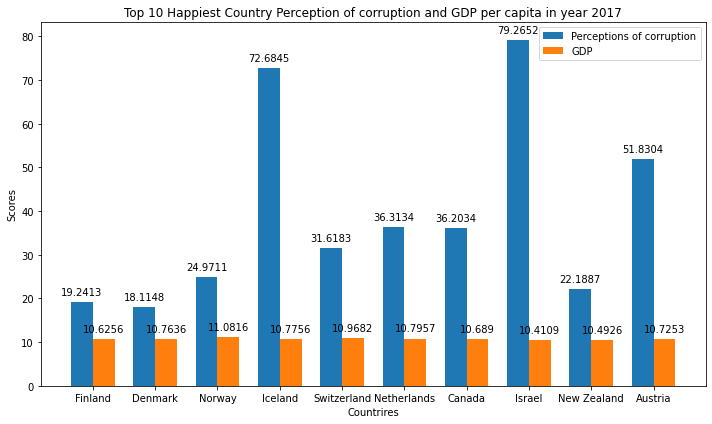

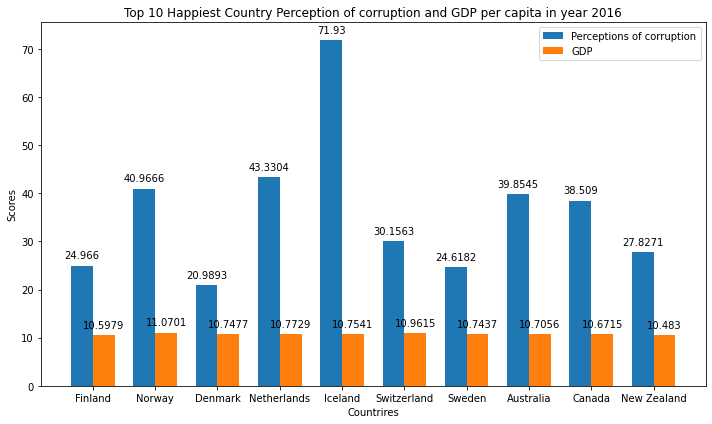

In [3]:
# Q2
def makeBarByYear(dataFrame,year):
    corruptions = dataFrame.head(10)['Perceptions of corruption']

    gdp = dataFrame.head(10)['Log GDP per capita']
    labels = dataFrame.head(10)['Country name']
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    fig.set_size_inches(10, 6, forward=True)
    rects1 = ax.bar(x - width / 2, corruptions * 100, width, label='Perceptions of corruption')
    rects2 = ax.bar(x + width / 2, gdp, width, label='GDP')
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores')
    ax.set_xlabel('Countrires')
    ax.set_title('Top 10 Happiest Country Perception of corruption and GDP per capita in year ' +  year)
    ax.set_xticks(x, labels)
    ax.legend()

    ax.bar_label(rects1, padding=5)
    ax.bar_label(rects2, padding=5)

    fig.tight_layout()

    plt.show()

def makeBarByYear2(dataFrame,year):
    corruptions = dataFrame.head(10)['Perceptions of corruption']

    gdp = dataFrame.head(10)['Logged GDP per capita']
    labels = dataFrame.head(10)['Country name']
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    fig.set_size_inches(10, 6, forward=True)
    rects1 = ax.bar(x - width / 2, corruptions * 100, width, label='Perceptions of corruption')
    rects2 = ax.bar(x + width / 2, gdp, width, label='GDP')
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores')
    ax.set_xlabel('Countries')
    ax.set_title('Top 10 Happiest Country Perception of corruption and GDP per capita in year ' +  year)
    ax.set_xticks(x, labels)
    ax.legend()

    ax.bar_label(rects1, padding=5)
    ax.bar_label(rects2, padding=5)

    fig.tight_layout()

    plt.show()

df2019 = df2019.sort_values('Life Ladder',ascending=False)
df2018 = df2018.sort_values('Life Ladder',ascending=False)
df2017 = df2017.sort_values('Life Ladder',ascending=False)
df2016 = df2016.sort_values('Life Ladder',ascending=False)

makeBarByYear2(df2021,'2021')
makeBarByYear2(df2020,'2020')
makeBarByYear(df2019,'2019')
makeBarByYear(df2018,'2018')
makeBarByYear(df2017,'2017')
makeBarByYear(df2016,'2016')


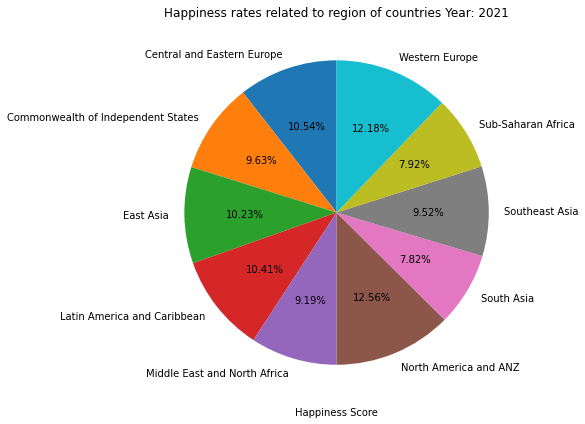

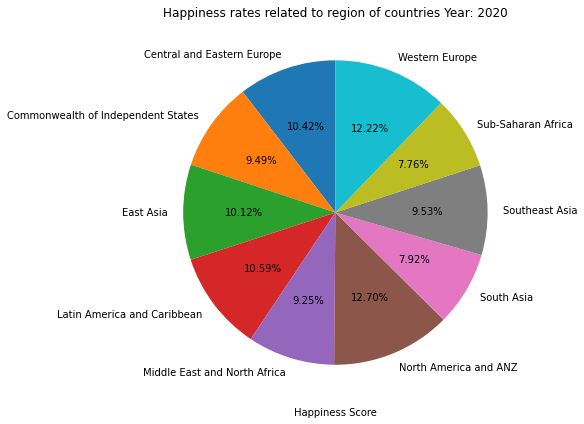

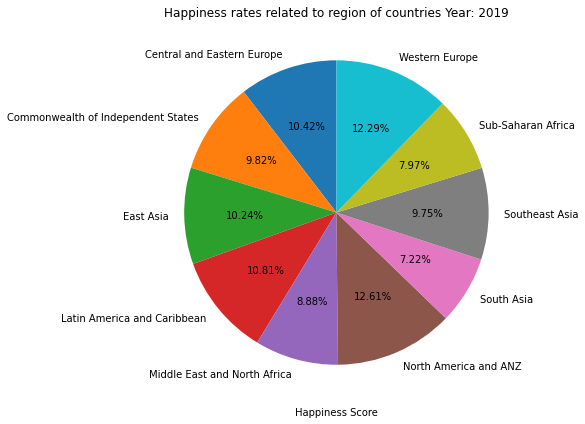

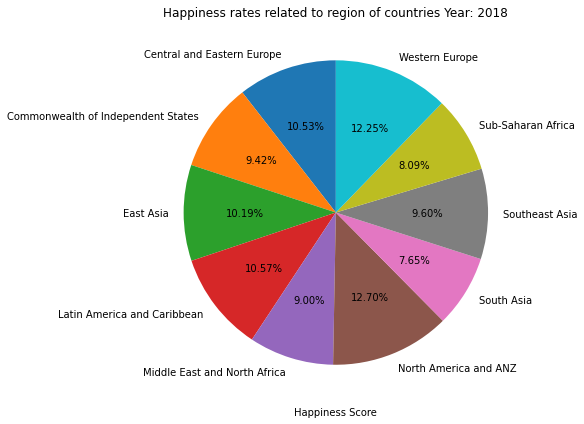

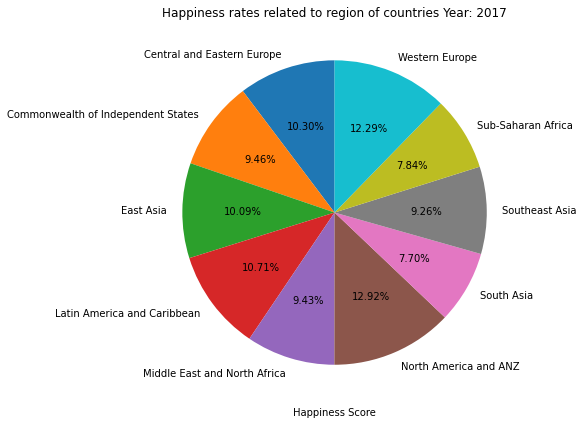

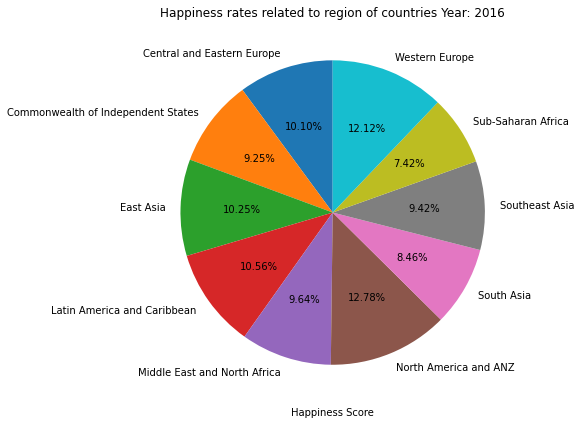

In [4]:
# Q7 Happiness rates related to region of countries pie chart
def makePieByYeaer(dataFrame,year):
    regionMeans = dataFrame.groupby(["Regional indicator"])['Life Ladder'].mean()
    regionMeanValues = list(regionMeans.values)

    labels2 = list(dataFrame.groupby(["Regional indicator"]).groups.keys())
    # print(regionMeanValues)
    # print(labels2)
    fig = plt.figure(figsize=(10, 7))
    plt.pie(regionMeanValues, labels=labels2, startangle=90, autopct='%1.2f%%')
    plt.title("Happiness rates related to region of countries Year: " + str(year))
    plt.xlabel("Happiness Score")
    plt.savefig(str(year)+'.png' )
    plt.show()
def makePieByYeaer2(dataFrame,year):
    regionMeans = dataFrame.groupby(["Regional indicator"])['Ladder score'].mean()
    regionMeanValues = list(regionMeans.values)

    labels2 = list(dataFrame.groupby(["Regional indicator"]).groups.keys())
    # print(regionMeanValues)
    # print(labels2)
    fig = plt.figure(figsize=(10, 7))
    plt.pie(regionMeanValues, labels=labels2, startangle=90, autopct='%1.2f%%')
    plt.title("Happiness rates related to region of countries Year: " + str(year))
    plt.xlabel("Happiness Score")
    plt.savefig(str(year) + '.png')
    plt.show()

makePieByYeaer2(df2021,'2021')
makePieByYeaer2(df2020,'2020')
makePieByYeaer(df2019,'2019')
makePieByYeaer(df2018,'2018')
makePieByYeaer(df2017,'2017')
makePieByYeaer(df2016,'2016')

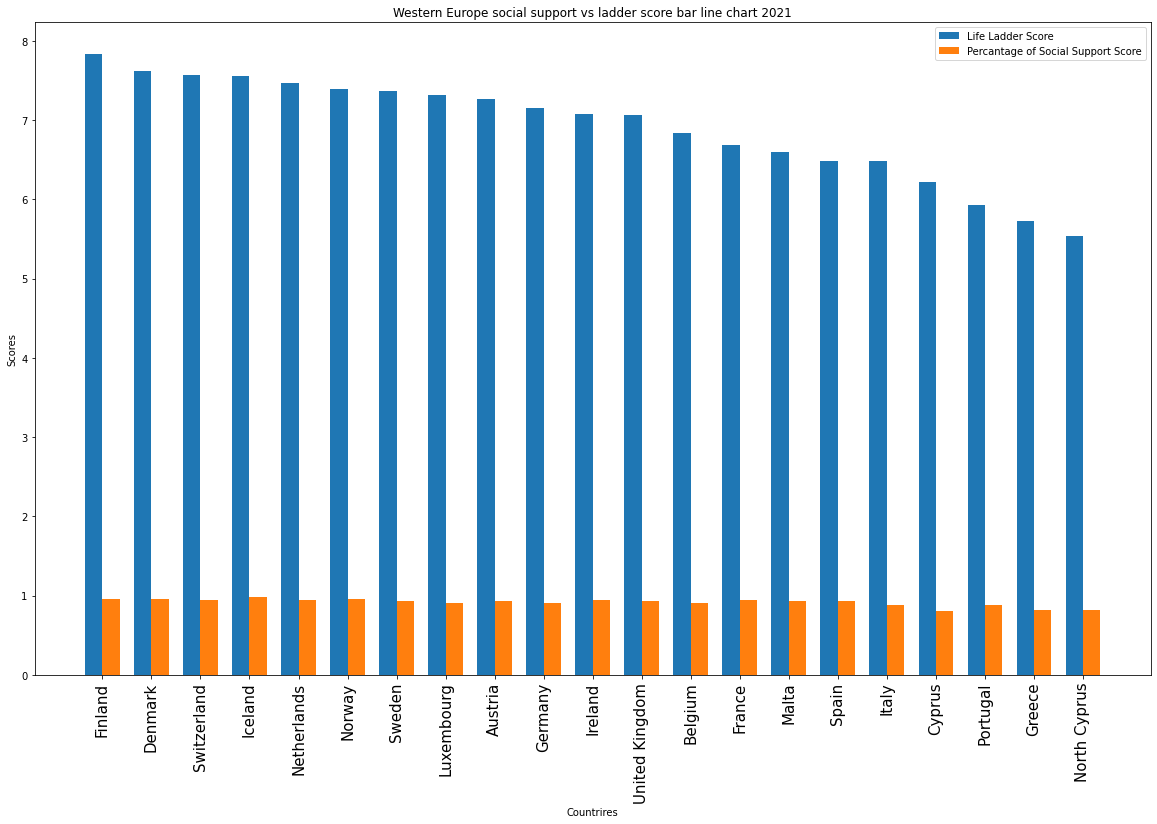

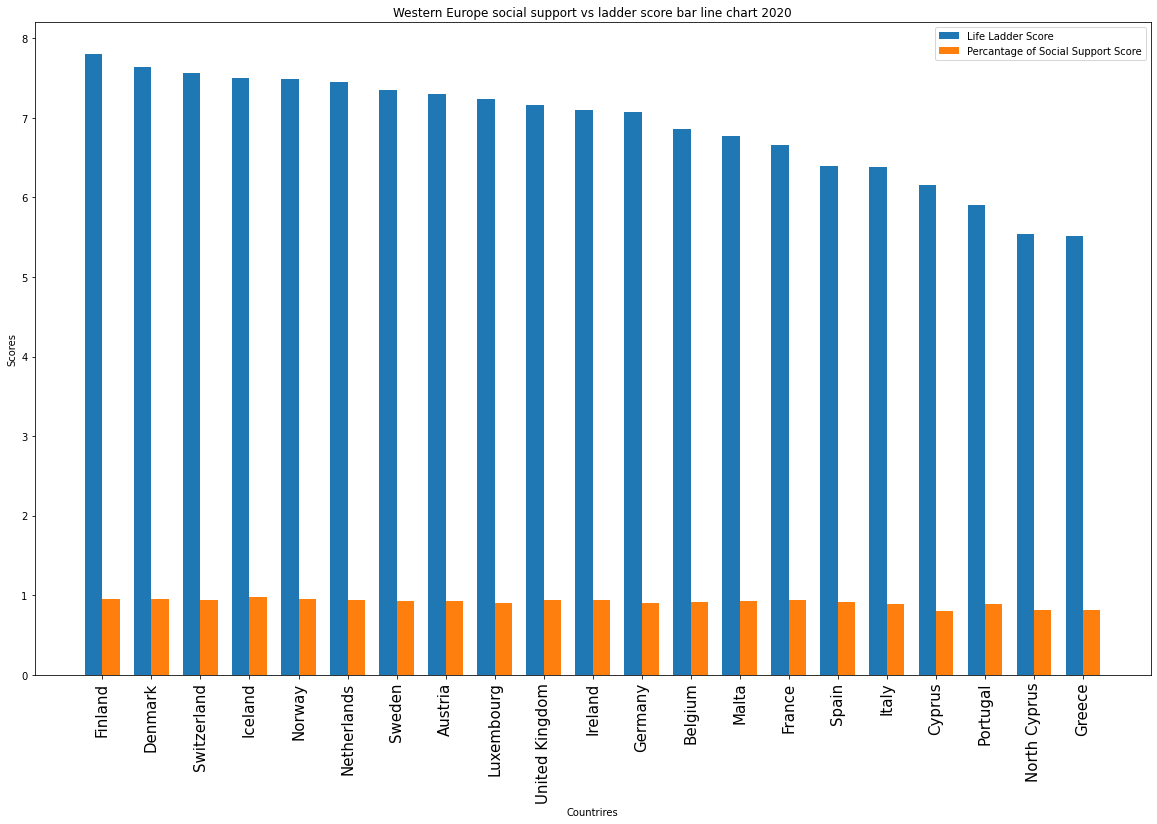

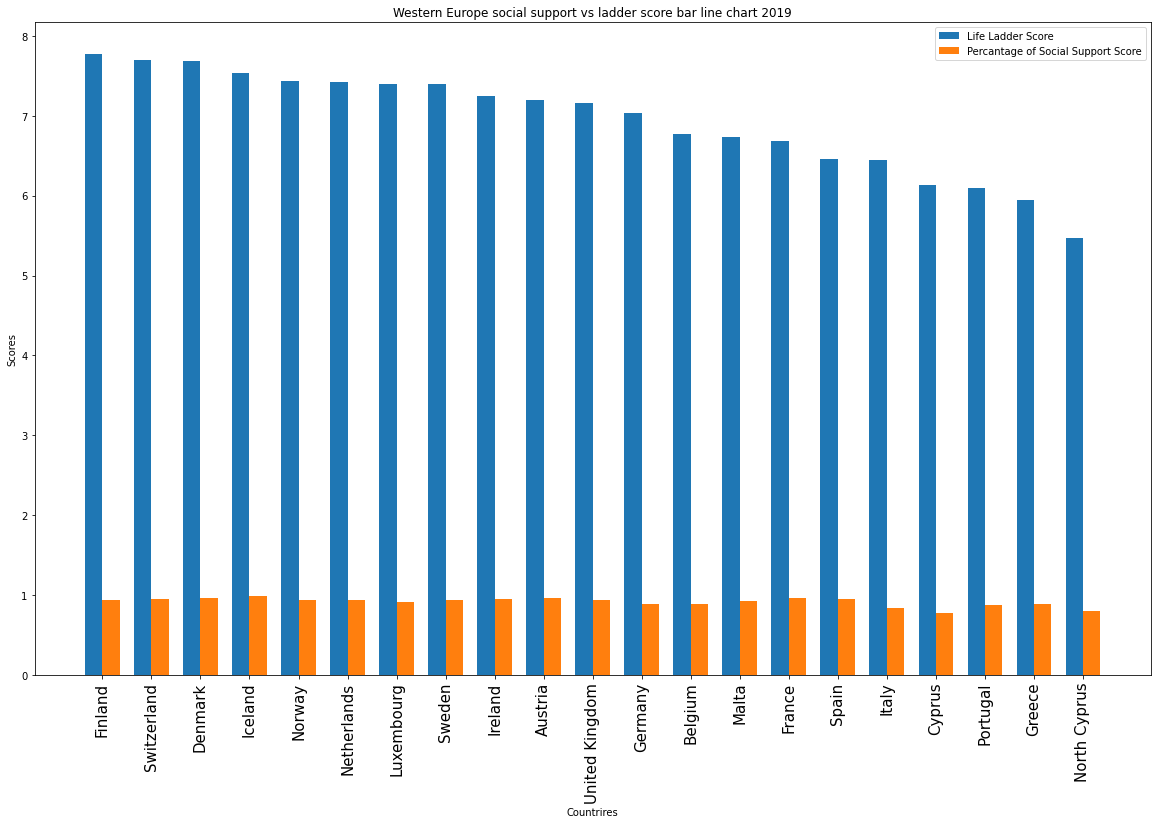

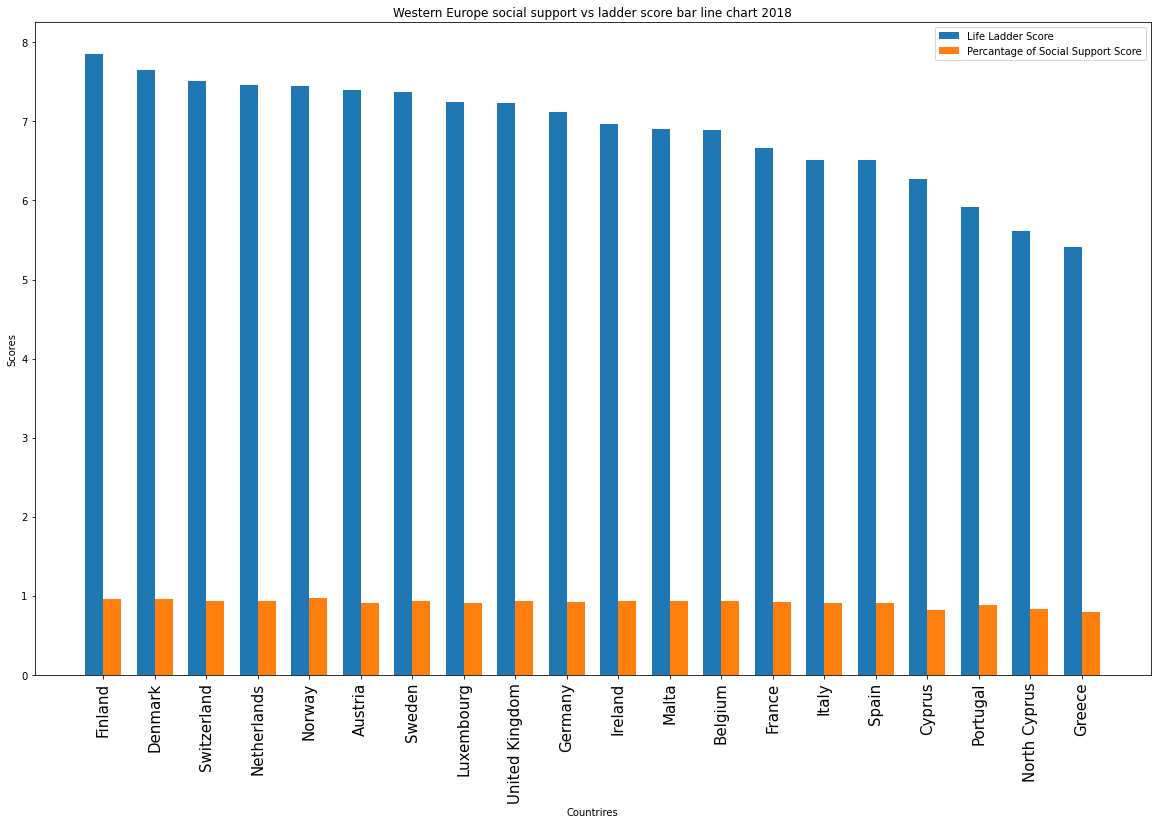

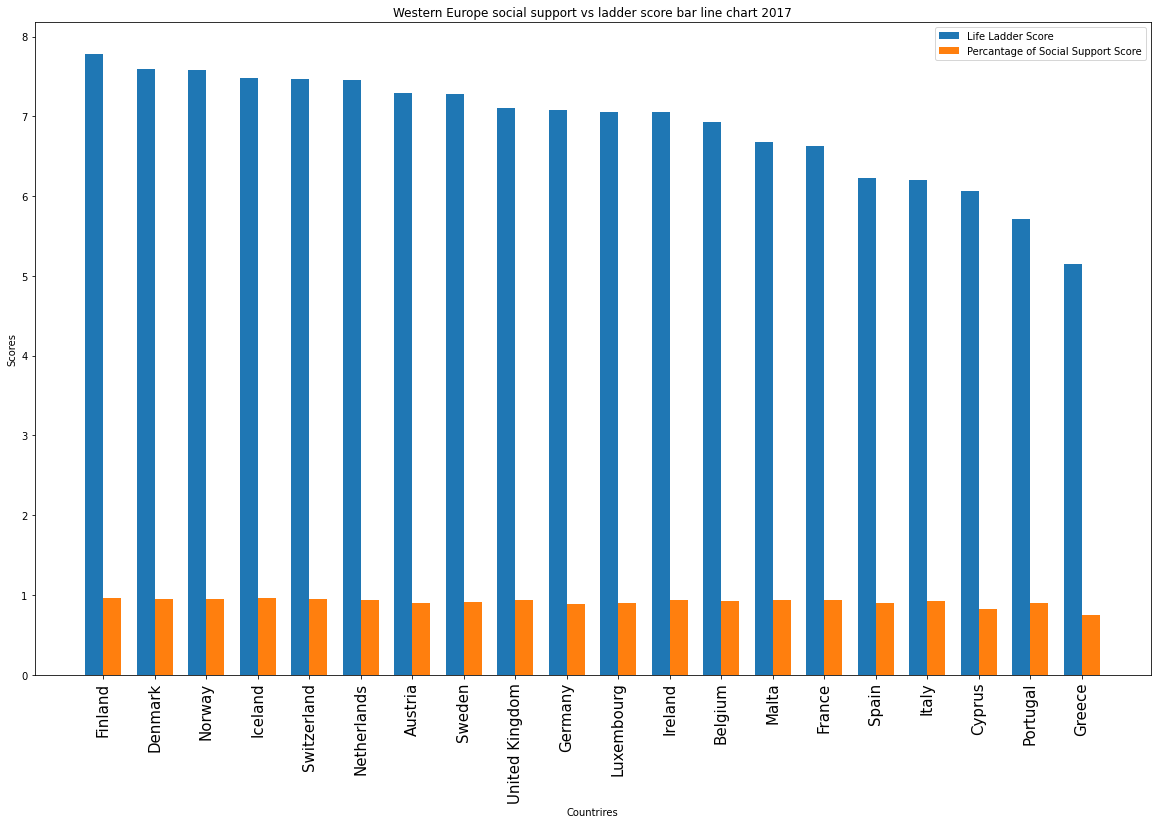

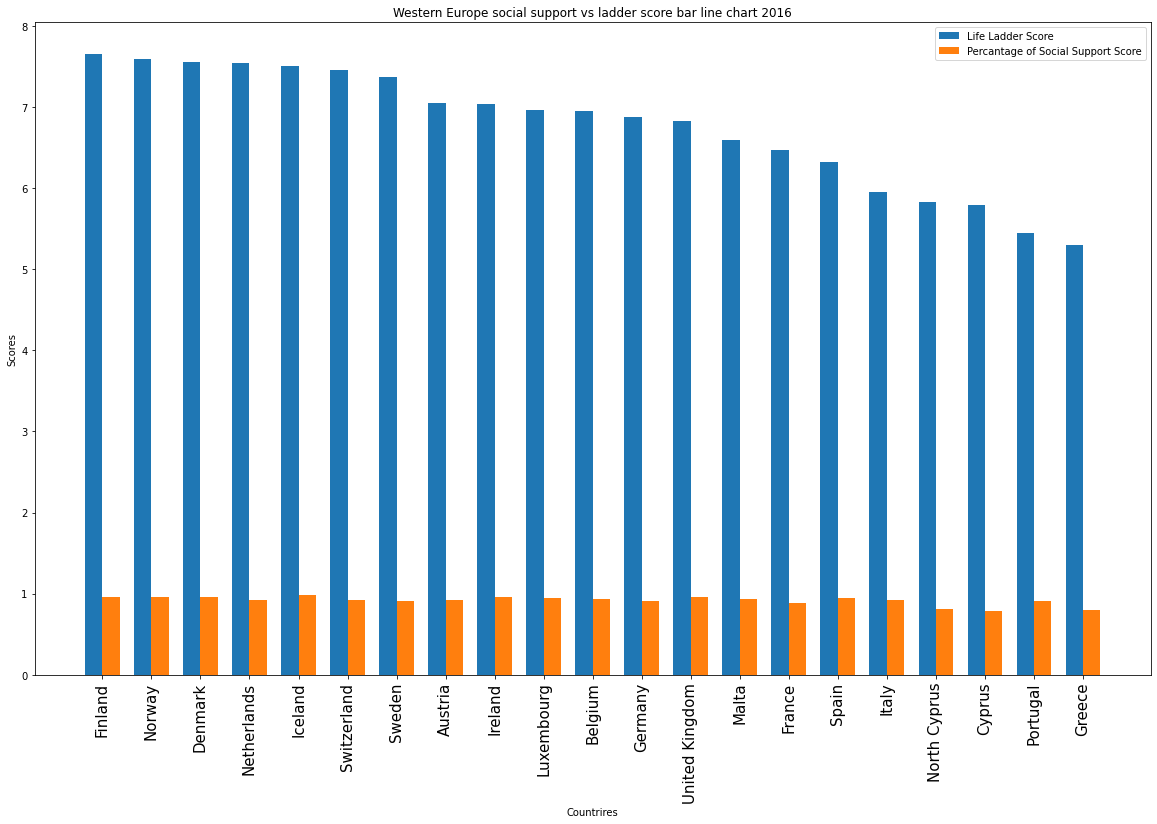

In [7]:
# Q8 Western Europe social support, ladder score bar line chart

def makeBarByYearSocialandLifeLAdder(dataFrame,year):
    lifeLadder = dataFrame.groupby("Regional indicator").get_group('Western Europe')['Life Ladder']

    socialSup = dataFrame.groupby("Regional indicator").get_group('Western Europe')['Social support']
    labels = dataFrame.groupby("Regional indicator").get_group('Western Europe')['Country name']
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    fig.set_size_inches(20, 12)
    rects1 = ax.bar(x - width / 2, lifeLadder , width, label='Life Ladder Score')
    rects2 = ax.bar(x + width / 2, socialSup, width, label='Percantage of Social Support Score')
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores')
    ax.set_xlabel('Countrires')
    ax.set_title('Western Europe social support vs ladder score bar line chart ' +  year)
    ax.set_xticks(x, labels, fontsize=15,rotation='vertical')
    ax.legend()
    plt.show()
    ax.legend()
def makeBarByYearSocialandLifeLAdder2(dataFrame, year):
    lifeLadder = dataFrame.groupby("Regional indicator").get_group('Western Europe')['Ladder score']
    socialSup = dataFrame.groupby("Regional indicator").get_group('Western Europe')['Social support']
    labels = dataFrame.groupby("Regional indicator").get_group('Western Europe')['Country name']
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    fig.set_size_inches(20, 12)
    ax.bar(x - width / 2, lifeLadder, width, label='Life Ladder Score')
    ax.bar(x + width / 2, socialSup, width, label='Percantage of Social Support Score')
    ax.set_ylabel('Scores')
    ax.set_xlabel('Countrires')
    ax.set_title('Western Europe social support vs ladder score bar line chart ' + year)
    ax.set_xticks(x, labels, fontsize=15,rotation='vertical')
    ax.legend()
    plt.show()

makeBarByYearSocialandLifeLAdder2(df2021,'2021')
makeBarByYearSocialandLifeLAdder2(df2020,'2020')
makeBarByYearSocialandLifeLAdder(df2019,'2019')
makeBarByYearSocialandLifeLAdder(df2018,'2018')
makeBarByYearSocialandLifeLAdder(df2017,'2017')
makeBarByYearSocialandLifeLAdder(df2016,'2016')